In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as snss
import missingno as msno
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

In [27]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type        to reduce memory usage.            """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                #    df[col] = df[col].astype(np.float32)
                #else:
                df[col] = df[col].astype(np.float16)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [28]:
df_train=pd.read_csv('train_final.csv')
df_test=pd.read_csv('test_final.csv')

In [29]:
print(df_train.shape)
target=df_train.Y
df_train.drop('Y',axis='columns',inplace=True)


(16383, 26)


In [30]:
frames=[df_train,df_test]
df=pd.concat(frames)
reduce_mem_usage(df)

Memory usage of dataframe is 6.50 MB
Memory usage after optimization is: 2.25 MB
Decreased by 65.4%


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,25884,1,33.625000,118596,1,0,118595,125738,1,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,34346,1,10.617188,118041,1,0,117902,130913,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,34923,1,1.769531,118327,1,0,117961,124402,1,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,80926,1,30.093750,118300,1,0,117961,301218,1,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,4674,1,1.769531,119921,1,0,119920,302830,1,...,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,32764,971,1,1.769531,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.769531,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.539062,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.769531,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2


In [31]:
#for i in df.columns:
    #if df[i].skew()>1 or df[i].skew()<-1:
        #df[i]=df[i].map(lambda i: np.log(i) if i > 0 else 0)

In [32]:
ID=df.Id
df1=df.drop('Id',axis='columns')
test_ID=ID[16383:]
test_ID.shape

(16385,)

In [33]:
df1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.000000,3.276800e+04,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,32768.000000,3.276800e+04,32768.000000
mean,42923.115509,1.042511,inf,118301.823212,1.045441,0.047760,116952.597015,170179.938049,1.043030,5.627777,...,25989.522491,118912.771729,183700.136932,1.048279,125916.370300,1.045715,1.043549,1.041229,2.228435e+04,1.043182
std,34174.395115,0.265731,inf,4551.658025,0.276843,0.310656,10875.728116,69509.942939,0.263166,95.839717,...,35928.434551,18961.612193,100488.195184,0.294797,31036.914405,0.263293,0.265218,0.240249,2.305925e+06,0.267341
min,-1.000000,1.000000,1.769531e+00,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,20298.000000,1.000000,1.769531e+00,118102.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,...,4566.000000,118394.000000,118363.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,35375.000000,1.000000,1.769531e+00,118300.000000,1.000000,0.000000,117961.000000,128696.000000,1.000000,0.000000,...,13545.000000,118921.000000,119006.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,74188.250000,1.000000,3.539062e+00,118386.000000,1.000000,0.000000,117961.000000,235280.000000,1.000000,1.000000,...,42034.000000,120535.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,312152.000000,17.000000,4.390400e+04,286791.000000,12.000000,24.000000,311178.000000,311867.000000,11.000000,10002.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,12.000000,7.000000,4.042886e+08,16.000000


In [34]:
for j in df1.columns:
    a=df1[j].quantile(0.95)
    b=df1[j].quantile(0.05)
    for i in df1[j]:
        if i>a or i<b:
            df1[j].replace(i,df1[j].median(),inplace=True)

In [35]:
df1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,32768.000000,32768.0,3.276800e+04,32768.000000,32768.0,32768.0,32768.000000,32768.000000,32768.0,32768.000000,...,32768.000000,32768.000000,32768.000000,32768.0,32768.000000,32768.0,32768.0,32768.0,32768.000000,32768.0
mean,40072.152405,1.0,inf,118298.193939,1.0,0.0,118038.339874,161626.254852,1.0,0.973328,...,20420.014984,119495.400757,178446.575226,1.0,119455.017822,1.0,1.0,1.0,10.664581,1.0
std,22879.839609,0.0,3.341797e+00,233.100978,0.0,0.0,225.119561,61717.072065,0.0,1.991534,...,20812.293222,1591.169448,95330.216113,0.0,2639.567752,0.0,0.0,0.0,26.046549,0.0
min,3852.000000,1.0,1.769531e+00,117936.000000,1.0,0.0,117902.000000,117906.000000,1.0,0.000000,...,1140.000000,117878.000000,19721.000000,1.0,117885.000000,1.0,1.0,1.0,1.000000,1.0
25%,23967.750000,1.0,1.769531e+00,118225.000000,1.0,0.0,117961.000000,118103.000000,1.0,0.000000,...,5048.000000,118403.000000,118398.000000,1.0,118321.000000,1.0,1.0,1.0,1.000000,1.0
50%,35375.000000,1.0,1.769531e+00,118300.000000,1.0,0.0,117961.000000,128696.000000,1.0,0.000000,...,13545.000000,118921.000000,119006.000000,1.0,118568.000000,1.0,1.0,1.0,2.000000,1.0
75%,45357.500000,1.0,3.539062e+00,118343.000000,1.0,0.0,117961.000000,185973.000000,1.0,1.000000,...,25607.000000,120312.000000,290919.000000,1.0,119192.000000,1.0,1.0,1.0,6.000000,1.0
max,81359.000000,1.0,2.123438e+01,119281.000000,1.0,0.0,119134.000000,306795.000000,1.0,12.000000,...,87910.000000,125016.000000,292795.000000,1.0,140847.000000,1.0,1.0,1.0,214.000000,1.0


In [36]:
#fig,ax=plt.subplots(nrows=len(df1.columns),figsize=(5,len(df.columns)*3.5))
#for #i in df1.columns:
    #print(df1[i].hist())
    ##plt.title(i)
    #plt.show()
    

In [37]:
Norm_df_train=df1[:16383]
shuffle(Norm_df_train, random_state=1)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
8129,43736,1.0,1.769531,118300,1.0,0.0,117961,117906,1.0,0.0,...,2594,120410,290919,1.0,117905,1.0,1.0,1.0,3,1.0
11743,25990,1.0,3.539062,118300,1.0,0.0,117902,142453,1.0,0.0,...,53150,118921,118398,1.0,118863,1.0,1.0,1.0,75,1.0
11536,28361,1.0,1.769531,118327,1.0,0.0,117961,127922,1.0,0.0,...,16244,120318,290919,1.0,120690,1.0,1.0,1.0,74,1.0
10017,35497,1.0,1.769531,118300,1.0,0.0,117961,236236,1.0,0.0,...,3119,120312,118638,1.0,119849,1.0,1.0,1.0,2,1.0
7369,25237,1.0,1.769531,118343,1.0,0.0,117961,120238,1.0,1.0,...,17261,118833,117887,1.0,118054,1.0,1.0,1.0,36,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16127,36964,1.0,1.769531,118257,1.0,0.0,118256,129082,1.0,4.0,...,15377,118623,292795,1.0,118995,1.0,1.0,1.0,1,1.0
5192,23126,1.0,1.769531,118225,1.0,0.0,117961,130134,1.0,0.0,...,7586,118403,118453,1.0,118451,1.0,1.0,1.0,1,1.0
12172,7677,1.0,3.539062,118225,1.0,0.0,117961,164476,1.0,1.0,...,17393,119781,270488,1.0,118207,1.0,1.0,1.0,19,1.0
235,3852,1.0,3.539062,118386,1.0,0.0,117961,254718,1.0,3.0,...,17592,121961,117887,1.0,118368,1.0,1.0,1.0,4,1.0


In [38]:
corr=Norm_df_train.corrwith(target)
corr.sort_values(ascending=False)

f14    0.050683
f16    0.029581
f13    0.027088
f19    0.011838
f1     0.009525
f4     0.002779
f8    -0.000727
f3    -0.001133
f23   -0.007033
f10   -0.007276
f12   -0.007360
f17   -0.013620
f15   -0.033550
f7    -0.039623
f2          NaN
f5          NaN
f6          NaN
f9          NaN
f11         NaN
f18         NaN
f20         NaN
f21         NaN
f22         NaN
f24         NaN
dtype: float64

In [39]:
Norm_df_test=df1[16383:]
Norm_df_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,37733,1.0,1.769531,118603,1.0,0.0,118602,118097,1.0,0.0,...,13881,117941,117887,1.0,117885,1.0,1.0,1.0,1,1.0
1,35375,1.0,3.539062,118052,1.0,0.0,117961,290919,1.0,4.0,...,14638,118992,290919,1.0,118321,1.0,1.0,1.0,7,1.0
2,24884,1.0,1.769531,118300,1.0,0.0,117961,302830,1.0,0.0,...,13545,119181,119006,1.0,128230,1.0,1.0,1.0,14,1.0
3,4674,1.0,1.769531,119091,1.0,0.0,119062,118036,1.0,9.0,...,16752,118921,290919,1.0,117905,1.0,1.0,1.0,81,1.0
4,68725,1.0,3.539062,118300,1.0,0.0,117961,171056,1.0,0.0,...,4945,118360,118638,1.0,118636,1.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,35375,1.0,1.769531,118300,1.0,0.0,117961,128696,1.0,0.0,...,4864,123055,118424,1.0,120344,1.0,1.0,1.0,44,1.0
16381,35375,1.0,1.769531,118327,1.0,0.0,117961,117906,1.0,0.0,...,32457,118320,290919,1.0,118321,1.0,1.0,1.0,4,1.0
16382,43096,1.0,3.539062,117962,1.0,0.0,117961,118368,1.0,0.0,...,2014,117904,117887,1.0,118368,1.0,1.0,1.0,1,1.0
16383,31220,1.0,1.769531,118386,1.0,0.0,117961,117906,1.0,1.0,...,1249,118910,290919,1.0,118321,1.0,1.0,1.0,2,1.0


In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train1,X_test1,y_train1,y_test1= train_test_split(Norm_df_train,target,test_size=0.2)
from imblearn.over_sampling import SMOTE

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(target== 0)))

Before OverSampling, counts of label '1': 15435
Before OverSampling, counts of label '0': 948 



In [42]:
smote = SMOTE(sampling_strategy=0.5,random_state=0)
X_sm, y_sm = smote.fit_resample(X_train1, y_train1)
X_sm_real, y_sm_real = smote.fit_resample(Norm_df_train, target)

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0)))


After OverSampling, the shape of train_X: (18514, 24)
After OverSampling, the shape of train_y: (18514,) 

After OverSampling, counts of label '1': 12343
After OverSampling, counts of label '0': 6171


In [43]:
shuffle(X_sm, random_state=1)
shuffle(y_sm, random_state=1)
shuffle(X_sm_real, random_state=1)
shuffle(y_sm_real, random_state=1)


9336     1
5507     1
8414     1
3361     1
7280     1
        ..
10955    1
17289    0
5192     1
12172    1
235      1
Name: Y, Length: 23152, dtype: int64

In [44]:
from sklearn.model_selection import cross_val_score
dtrain = xgb.DMatrix(X_sm, label=y_sm)
dtest = xgb.DMatrix(X_test1, label=y_test1)
dvaltest=xgb.DMatrix(X_test1)
drealtrain = xgb.DMatrix(X_sm_real, label=y_sm_real)
drealtest = xgb.DMatrix(Norm_df_test)
from sklearn.metrics import accuracy_score

In [45]:
params = {
    'max_depth':7,
    'min_child_weight': 2,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'lambda':5,
    'alpha' :0
}
NUM_BOOST_ROUNDS=1000

In [46]:
xbg_model1 = xgb.train(
    params,
    dtrain,
    num_boost_round=NUM_BOOST_ROUNDS,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)
print("Best AUC: {:.2f}, found at round {}".format(
                 xbg_model1.best_score,
                 xbg_model1.best_iteration))

[0]	Test-auc:0.73809
[1]	Test-auc:0.77034
[2]	Test-auc:0.78793
[3]	Test-auc:0.78872
[4]	Test-auc:0.79595
[5]	Test-auc:0.79468
[6]	Test-auc:0.79476
[7]	Test-auc:0.80015
[8]	Test-auc:0.81106
[9]	Test-auc:0.81276
[10]	Test-auc:0.81397
[11]	Test-auc:0.81965
[12]	Test-auc:0.82162
[13]	Test-auc:0.82263
[14]	Test-auc:0.82394
[15]	Test-auc:0.82788
[16]	Test-auc:0.83042
[17]	Test-auc:0.83231
[18]	Test-auc:0.83287
[19]	Test-auc:0.83875
[20]	Test-auc:0.83988
[21]	Test-auc:0.84104
[22]	Test-auc:0.84193
[23]	Test-auc:0.84440
[24]	Test-auc:0.84655
[25]	Test-auc:0.84890
[26]	Test-auc:0.84900
[27]	Test-auc:0.84943
[28]	Test-auc:0.85101
[29]	Test-auc:0.85289
[30]	Test-auc:0.85264
[31]	Test-auc:0.85239
[32]	Test-auc:0.85069
[33]	Test-auc:0.85076
[34]	Test-auc:0.85318
[35]	Test-auc:0.85372
[36]	Test-auc:0.85259
[37]	Test-auc:0.85288
[38]	Test-auc:0.85291
[39]	Test-auc:0.85210
[40]	Test-auc:0.85243
[41]	Test-auc:0.85333
[42]	Test-auc:0.85434
[43]	Test-auc:0.85610
[44]	Test-auc:0.85490
[45]	Test-auc:0.8549

In [47]:
y_valnewpred=xbg_model1.predict(dvaltest)
print('auc score-',metrics.roc_auc_score(y_test1, y_valnewpred))


auc score- 0.8680290898919617


In [51]:
xbg_model3 = xgb.train(
   params,
drealtrain,
    num_boost_round=98)

True     15880
False      505
Name: 0, dtype: int64

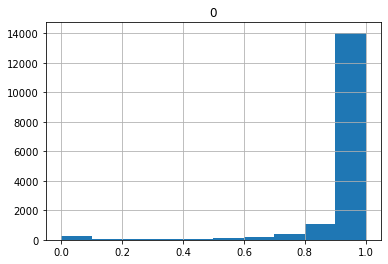

In [52]:
y_newpred=xbg_model3.predict(drealtest)
h=pd.DataFrame(y_newpred)
h.hist()
d=h>0.5
d[0].value_counts()


In [53]:
output2 = pd.DataFrame({'id':test_ID,'Y':y_newpred})
output2.to_csv('removing outliers with median.csv', index=False)